In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
review = 1000
negative_chance = 0.168
human_cost = 0.88
review_value = 10
mislabel_cost = 1.15
effectiveness = [0.9, 0.55, 0.62]
precision_loss = [0.1, 1.6, 3]

human_value = (negative_chance * review * review_value * effectiveness[0]) - (human_cost * review) - (negative_chance * review * mislabel_cost *precision_loss[0]) 
model1_value = (negative_chance * review * review_value * effectiveness[1]) - (negative_chance * review * mislabel_cost *precision_loss[1]) 
model2_value = (negative_chance * review * review_value * effectiveness[2]) - (negative_chance * review * mislabel_cost * precision_loss[2]) 

# Reviews

In [3]:
value = {}
for review in np.arange(0, 10000, 10):
    human_value = (negative_chance * review * review_value * effectiveness[0]) - (human_cost * review) - (negative_chance * review * mislabel_cost *precision_loss[0]) 
    model1_value = (negative_chance * review * review_value * effectiveness[1]) - (negative_chance * review * mislabel_cost *precision_loss[1]) 
    model2_value = (negative_chance * review * review_value * effectiveness[2]) - (negative_chance * review * mislabel_cost * precision_loss[2])
    value[review] = [human_value, model1_value, model2_value]

In [4]:
value_df = pd.DataFrame.from_dict(value, orient = 'index')

In [5]:
value_df.columns = ["Human", "Model1", "Model2"]

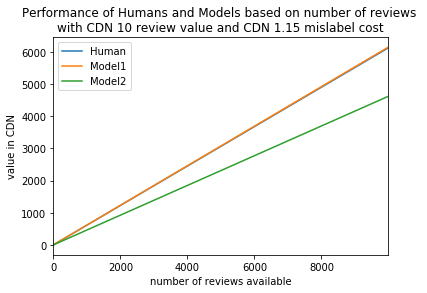

In [6]:
value_df.plot()
plt.title('Performance of Humans and Models based on number of reviews \nwith CDN %d review value and CDN %.2f mislabel cost' % (review_value, mislabel_cost))
plt.xlabel("number of reviews available")
plt.ylabel("value in CDN")
plt.show()